In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pathlib import Path

In [41]:
# Set base directory
project_root = Path.cwd().parent
processed_dir = project_root / "data" / "processed"
synthetic_dir = project_root / "data" / "synthetic"

In [42]:
# Load data
credit_combined_path = processed_dir / "credit_combined_full.csv"
if credit_combined_path.exists():
    credit_df_combined = pd.read_csv(credit_combined_path)
    print("Final dataset loaded:", credit_df_combined.shape)
else:
    raise FileNotFoundError(f"File not found at: {credit_combined_path}")

Final dataset loaded: (568630, 31)


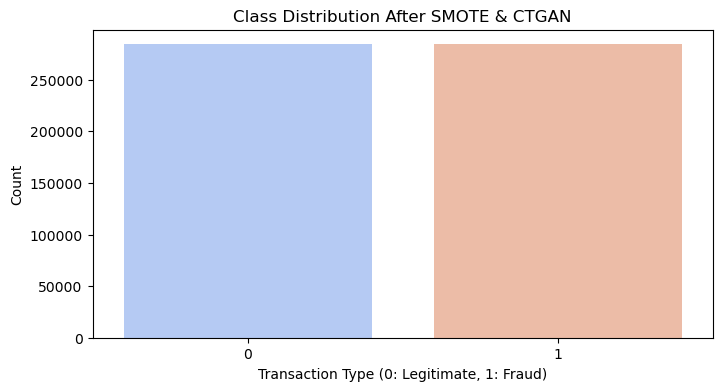

In [43]:
# Plot class distribution before and after SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=credit_df_combined, palette='coolwarm')
plt.title('Class Distribution After SMOTE & CTGAN')
plt.xlabel('Transaction Type (0: Legitimate, 1: Fraud)')
plt.ylabel('Count')
plt.show()

Based on the bar chart above, the number of legitimate (Class 0) and fraudulent (Class 1) transactions are nearly equal, indicating that the dataset has been balanced using synthetic data generation. Originally, fraudulent transactions were highly imbalanced meaning that they were significantly fewer than legitimate ones, but after applying SMOTE and CTGAN, the counts have been adjusted.

c:\Users\danar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


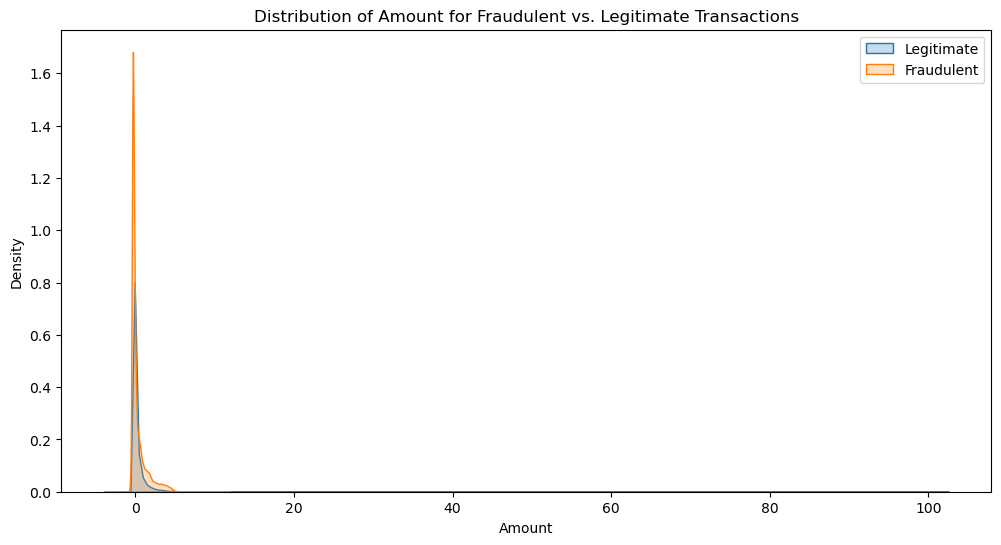

In [45]:
# Visualizing feature distributions for fraud vs. legitimate transactions
plt.figure(figsize=(12, 6))
for feature in ['Amount']:
    sns.kdeplot(credit_df_combined[credit_df_combined['Class'] == 0][feature], label='Legitimate', fill=True)
    sns.kdeplot(credit_df_combined[credit_df_combined['Class'] == 1][feature], label='Fraudulent', fill=True)
    plt.title(f'Distribution of {feature} for Fraudulent vs. Legitimate Transactions')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Both distributions are heavily skewed towards lower amounts, which means that most transactions, whether fraudulent or legitimate, involve smaller amounts. As the transaction amount increases, the density for both types of transactions rapidly decreases, which indicates that higher-value transactions are less common. Lastly, the density of fraudulent transactions appears to be slightly higher at lower amounts compared to legitimate transactions, which can suggest that fraudulent activities are more likely to occur with smaller transaction amounts.

In [46]:
# Load real and synthetic fraud data
real_fraud = credit_df_combined[credit_df_combined['Class'] == 1].drop(columns=['Class'])
fake_fraud_path = synthetic_dir / "credit_ctgan_fraud.csv"
if fake_fraud_path.exists():
    synthetic_fraud = pd.read_csv(fake_fraud_path).drop(columns=['Class'])
else:
    raise FileNotFoundError(f"Synthetic fraud file not found at: {fake_fraud_path}")

In [47]:
# PCA Analysis
pca = PCA(n_components=2)
real_pca = pca.fit_transform(real_fraud)
fake_pca = pca.transform(synthetic_fraud)

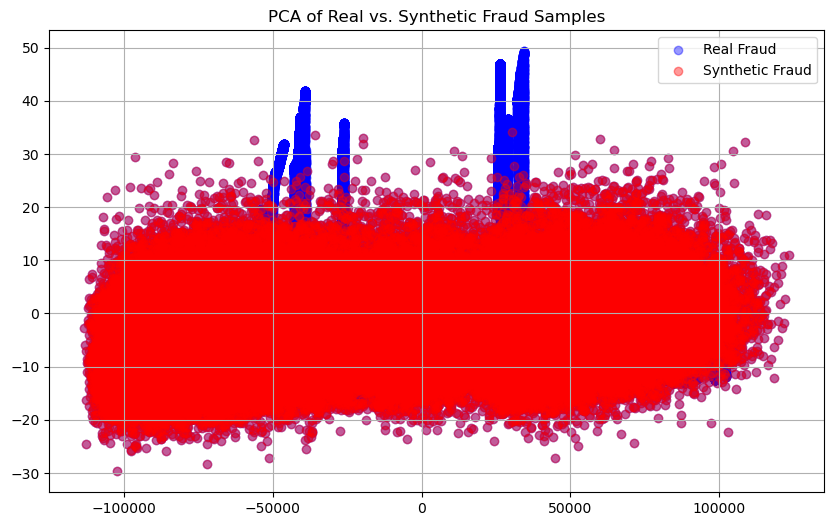

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], c='blue', alpha=0.4, label='Real Fraud')
plt.scatter(fake_pca[:, 0], fake_pca[:, 1], c='red', alpha=0.4, label='Synthetic Fraud')
plt.title('PCA of Real vs. Synthetic Fraud Samples')
plt.legend()
plt.grid(True)
plt.show()

The blue points representing real fraud samples are primarily clustered between the y-values of 0 and 50. This indicates that real fraud samples tend to have similar characteristics, leading to their clustering in this specific region. The red points representing synthetic fraud samples are spread out more evenly across the entire range of both axes, which suggests that synthetic fraud samples have a wider variety of characteristics, thereby making them more dispersed. The x-axis ranges from -100000 to 100000, and the y-axis ranges from -40 to 50, indicating significant variability in the data.